In [71]:
# importing the libraries

import pandas as pd
from matplotlib import pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing

import networkx as nx
import seaborn as sns

In [67]:
# reading the dataset 

data = pd.read_csv("Groceries_dataset.csv")
data.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


## Data Preprocessing

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
#data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

Count the number of unique values in __Member_number__, __Date__ and __itemDescription__.

In [6]:

len(data['Member_number'].unique())

3898

In [7]:
len(data['Date'].unique())

728

In [8]:
len(data['itemDescription'].unique())

167

How many times each item appeared in __itemDescription__

In [9]:
data['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
toilet cleaner              5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

__NOTE__: Appending itemDescription with same __Member_Number__ and __Date__ into list.

1808	21-07-2015	tropical fruit

2552	05-01-2015	whole milk

2300	19-09-2015	pip fruit
 
1808	21-07-2015	other vegetables

3037	19-09-2015	whole milk

__Convert into dictionary__

'1808 21-07-2015': [tropical fruit, other vegetables]

'2552 05-01-2015': [whole milk]

'2300 19-09-2015': [pip fruit]

'3037 19-09-2015': [whole milk]

In [81]:
dict_data = dict()

for i,d,it in zip(data['Member_number'], data['Date'], data['itemDescription']):
    
    key = (str(i) + ' ' + d)
    
    if key in dict_data.keys():
        
        
        prev_items = dict_data[key]
        
        #if isinstance(prev_items, str):
            
        #    temp = []
        #    temp.append(prev_items)
        #    temp.append(it)
        #    dict_data[key] = temp
            
        if isinstance(prev_items, list):
            
            prev_items.append(it)
            dict_data[key] = prev_items
        
    else:
        
        temp = []
        temp.append(it)
        dict_data[key] = temp
    
    
    

In [75]:
# Creating a dataframe from dict of list

#data2 = pd.DataFrame.from_dict(dict_data, orient='index')

In [74]:
#!pip install mlxtend

In [83]:
data_list = []
for val in dict_data.values():
    
    data_list.append(val)

In [84]:
data_list[:10]

[['tropical fruit', 'rolls/buns', 'candy'],
 ['whole milk', 'tropical fruit', 'chocolate'],
 ['pip fruit', 'other vegetables', 'flour'],
 ['other vegetables', 'onions', 'shopping bags'],
 ['whole milk', 'other vegetables', 'white bread'],
 ['rolls/buns', 'citrus fruit', 'fruit/vegetable juice'],
 ['other vegetables', 'bottled water', 'shopping bags'],
 ['pot plants', 'citrus fruit', 'whipped/sour cream'],
 ['whole milk', 'specialty bar', 'newspapers'],
 ['tropical fruit', 'citrus fruit', 'soda']]

In [85]:
# Transform the data_list

encode = mlxtend.preprocessing.TransactionEncoder()
encode_arr =encode.fit_transform(data_list)


In [86]:
encode_arr.shape

(14963, 167)

In [87]:
# Convert the transform data into dataframe

encode_df = pd.DataFrame(encode_arr, columns=encode.columns_)

In [88]:
encode_df.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori Algorithm

In [89]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
5,0.060683,(bottled water)
6,0.037626,(brown bread)
7,0.035220,(butter)
8,0.017577,(butter milk)
9,0.014369,(candy)


## Association Rules

#### Creating rules (Metric: Confidence) Antecedents ⇒ Consequents


In [90]:
rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.06,support_only=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638


#### Creating rules (Metric: Lift) Antecedents ⇒ Consequents


In [91]:
rules2 = mlxtend.frequent_patterns.association_rules(md_min_support, metric='lift',
                                                    min_threshold=0.06, support_only=False)

rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638


## Plotting

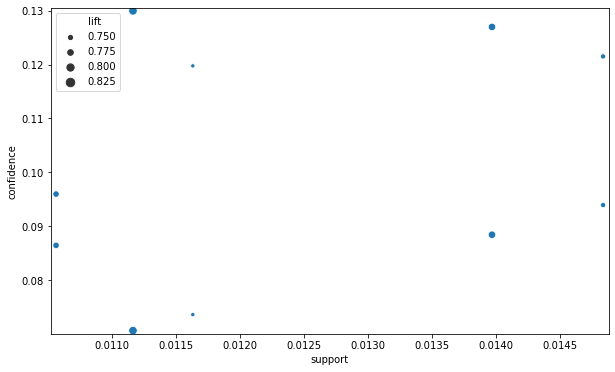

In [95]:


# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)

plt.margins(0.01,0.01)
plt.show()